IndexError: list index out of range

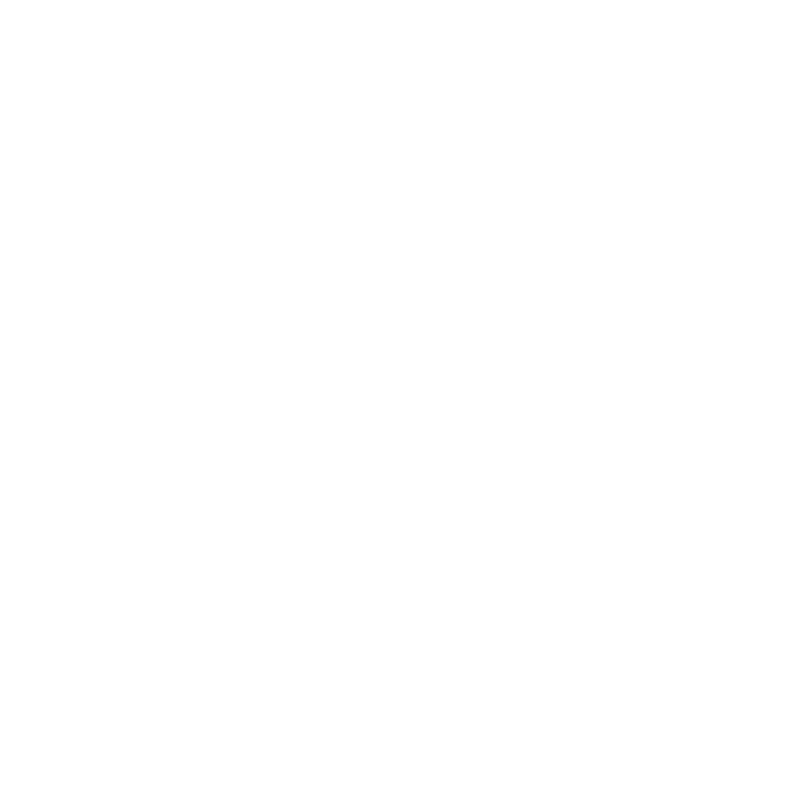

In [56]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)

num = 799

img_lo = r"C:\Users\hi020\Desktop\play\sample_train1\png\{}.png".format(num)

bbox_list = []

def yxwh(x, bbox_list):
    if x:
        if type(x) == list:
            for _x in x:
                if type(_x) == dict:
                    a = _x.keys()
                    for i in a:
                        if i == 'bboxes':
                            bbox_list += _x[i]
                        elif i == 'bbox':
                            bbox_list.append(_x[i])
                        else:
                            yxwh(_x[i], bbox_list)
        elif type(x) == dict:
            a = x.keys()
            for i in a:
                if i == 'bboxes':
                    bbox_list += x[i]
                elif i == 'bbox':
                    if list(x[i].keys()) == ['bbox']:
                        bbox_list.append(x[i]['bbox'])
                    else:
                        bbox_list.append(x[i])
                else:
                    yxwh(x[i], bbox_list)
                    
yxwh(data[num]['models'], bbox_list)

points = []
points.append((data[num]['general_figure_info']['plot_info']['bbox']['x'] + data[num]['general_figure_info']['plot_info']['bbox']['w']/2,
               data[num]['general_figure_info']['plot_info']['bbox']['y'] + data[num]['general_figure_info']['plot_info']['bbox']['h']/2))

points.append((points[-1][0] + data[num]['general_figure_info']['plot_info']['bbox']['w']/2,
               points[-1][1]))

radian = 0.
total_span = sum([i['span'] for i in data[num]['models']])  # 전체 span 합산
for i in data[num]['models']:
    radian += i['span']
    points.append((points[0][0] + data[num]['general_figure_info']['plot_info']['bbox']['w']/2*np.cos(radian),
                points[0][1] - data[num]['general_figure_info']['plot_info']['bbox']['w']/2*np.sin(radian)))

from matplotlib.patches import Circle

patches = []

for p1 in points:
    patches.append(Circle(edge, radius=2, color='red'))

fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_axis_off()
for p in patches:
    ax.add_patch(p)

# 범례 추가
legend_item = data[num]['general_figure_info']['legend']['items']
legend_num = len(legend_item)
legend_labels = []

for k in range(legend_num):
    model_name = legend_item[k]['model']
    # 각 모델의 비율 계산
    model_span = data[num]['models'][k]['span']
    model_percentage = (model_span / total_span) * 100  # 비율을 퍼센테이지로 변환
    legend_label = "{}: {:.1f}%".format(model_name, model_percentage)  # 모델명과 비율을 포함한 레이블
    ax.text((points[k+1][0]+points[k+2][0])/2, (points[k+1][1]+points[k+2][1])/2, legend_label, ha='center', va='center', fontsize=12, color='black')

# 범례를 그래프 내부에 추가
ax.imshow(plt.imread(img_lo))


center = points[0]
i = len(points)-1
edge=[]
for k in range(i):
    edge[k-1] = points[k]

(209.484375, 212.5)
(323.08680555555554, 212.5)
(298.4403616367762, 141.84347397722195)
(280.64106744815615, 123.94359228170819)
(209.92641371469028, 326.10157054330074)
(323.08680555555554, 212.50000000000003)


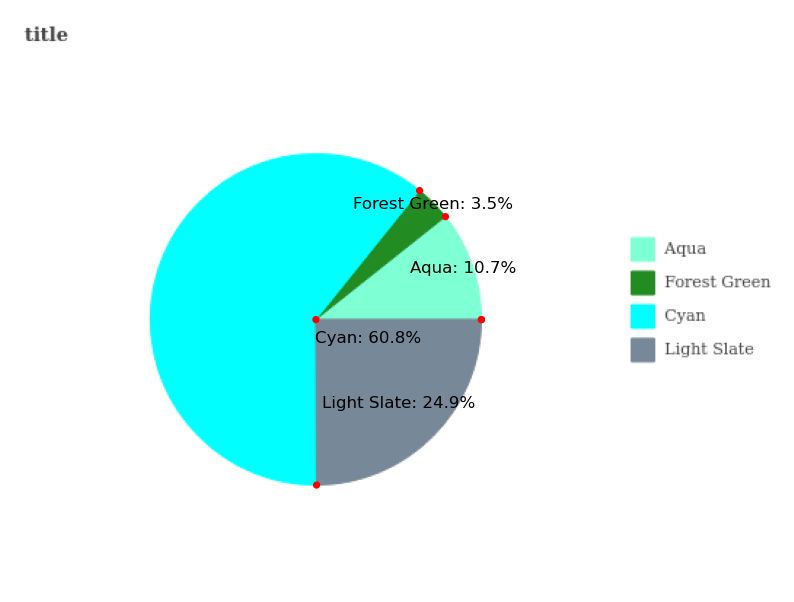

In [59]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Circle

# JSON 파일을 읽어옵니다.
with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)

num = 799
img_lo = r"C:\Users\hi020\Desktop\play\sample_train1\png\{}.png".format(num)
bbox_list = []

# yxwh 함수 정의
def yxwh(x, bbox_list):
    if x:
        if isinstance(x, list):
            for _x in x:
                if isinstance(_x, dict):
                    for i in _x.keys():
                        if i == 'bboxes':
                            bbox_list += _x[i]
                        elif i == 'bbox':
                            bbox_list.append(_x[i])
                        else:
                            yxwh(_x[i], bbox_list)
        elif isinstance(x, dict):
            for i in x.keys():
                if i == 'bboxes':
                    bbox_list += x[i]
                elif i == 'bbox':
                    if list(x[i].keys()) == ['bbox']:
                        bbox_list.append(x[i]['bbox'])
                    else:
                        bbox_list.append(x[i])
                else:
                    yxwh(x[i], bbox_list)
                    
yxwh(data[num]['models'], bbox_list)

points = []
points.append((data[num]['general_figure_info']['plot_info']['bbox']['x'] + data[num]['general_figure_info']['plot_info']['bbox']['w']/2,
               data[num]['general_figure_info']['plot_info']['bbox']['y'] + data[num]['general_figure_info']['plot_info']['bbox']['h']/2))

points.append((points[-1][0] + data[num]['general_figure_info']['plot_info']['bbox']['w']/2,
               points[-1][1]))

radian = 0.
total_span = sum([i['span'] for i in data[num]['models']])  # 전체 span 합산
for i in data[num]['models']:
    radian += i['span']
    points.append((points[0][0] + data[num]['general_figure_info']['plot_info']['bbox']['w']/2*np.cos(radian),
                points[0][1] - data[num]['general_figure_info']['plot_info']['bbox']['w']/2*np.sin(radian)))

# Circle 객체를 생성하여 patches 리스트에 추가합니다.
patches = []
for p1 in points:
    print(p1)
    patches.append(Circle(p1, radius=2, color='red'))

fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_axis_off()

# patches 리스트에 있는 모든 Circle 객체를 ax에 추가합니다.
for p in patches:
    ax.add_patch(p)

# 범례 추가
legend_item = data[num]['general_figure_info']['legend']['items']
legend_num = len(legend_item)
legend_labels = []

for k in range(legend_num):
    model_name = legend_item[k]['model']
    # 각 모델의 비율 계산
    model_span = data[num]['models'][k]['span']
    model_percentage = (model_span / total_span) * 100  # 비율을 퍼센테이지로 변환
    legend_label = "{}: {:.1f}%".format(model_name, model_percentage)  # 모델명과 비율을 포함한 레이블
    ax.text((points[k+1][0]+points[k+2][0])/2, (points[k+1][1]+points[k+2][1])/2, legend_label, ha='center', va='center', fontsize=12, color='black')

# 범례를 그래프 내부에 추가합니다.
ax.imshow(plt.imread(img_lo))

# center = points[0]  # center 변수는 사용되지 않음
# i = len(points)-1  # i 변수도 사용되지 않음
# edge=[]  # edge 리스트 초기화

# for k in range(i):
#     edge[k-1] = points[k]  # edge 리스트에 값 할당하는 부분


In [58]:
p1

(323.08680555555554, 212.50000000000003)

In [49]:
points

[(209.484375, 212.5),
 (323.08680555555554, 212.5),
 (298.4403616367762, 141.84347397722195),
 (280.64106744815615, 123.94359228170819),
 (209.92641371469028, 326.10157054330074),
 (323.08680555555554, 212.50000000000003)]

In [50]:
center = points[0]
i = len(points)-1

In [42]:
edge_rounded = [(round(x, 2), round(y, 2)) for x, y in edge]

print(edge_rounded)

print(center)

[]
(209.484375, 212.5)


In [52]:
center

(209.484375, 212.5)

In [ ]:
de